## 1 задача

1. Скачать данные по ссылке
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк

In [1]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.1 Изучите стоимости недвижимости
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

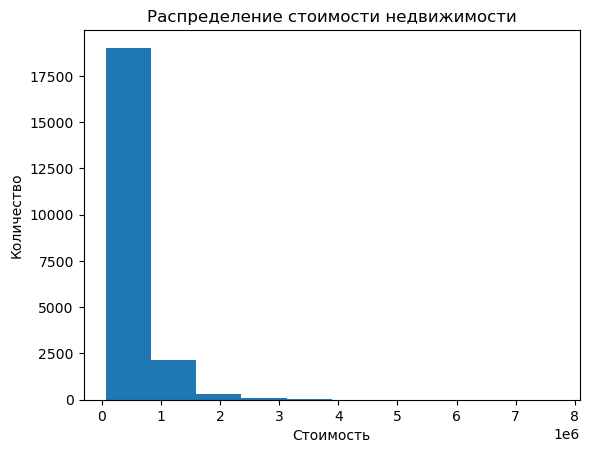

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

### 1.2 Изучите распределение жилой квадратуры
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

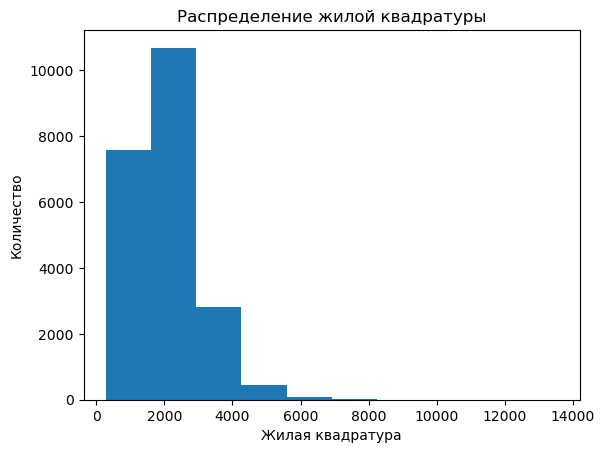

In [5]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой квадратуры')
plt.xlabel('Жилая квадратура')
plt.ylabel('Количество');

### 1.3 Изучите распределение года постройки
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

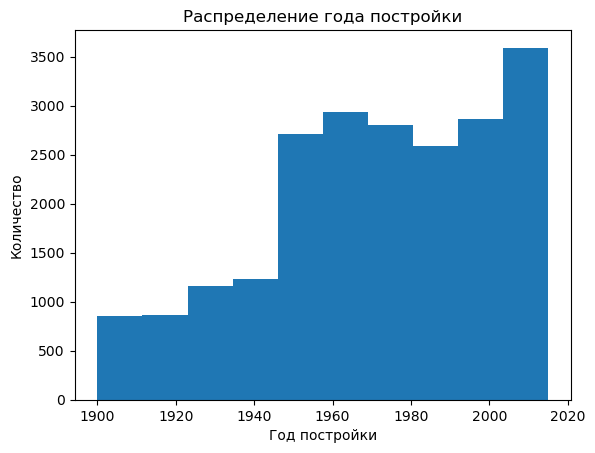

In [6]:
plt.hist(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

## 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

In [7]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

In [8]:
names = data.index
values = data.values

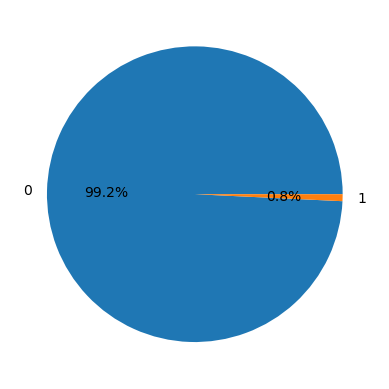

In [9]:
plt.pie(values, labels = names, autopct = '%.1f%%');

### 2.2 Изучите распределение этажей домов
- Постройте график
- Сделайте выводы

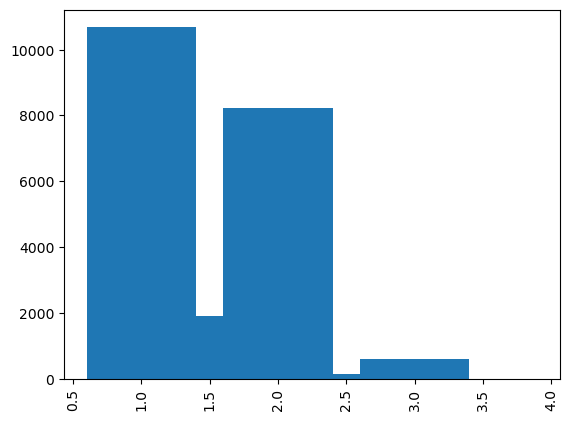

In [10]:
data = df['floors'].value_counts()
names = data.index
values = data.values
plt.bar(names, values)
plt.xticks(rotation = 90);

### 2.3 Изучите распределение состояния домов
- Постройте график
- Сделайте выводы

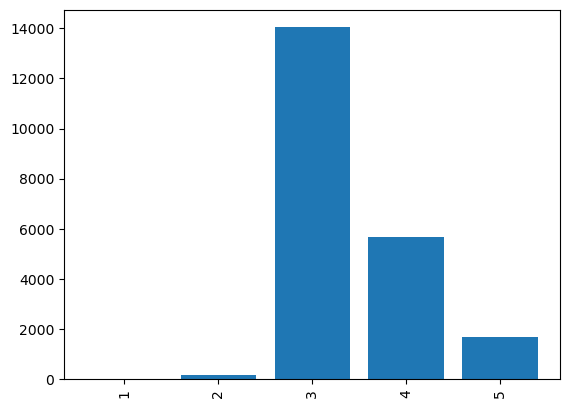

In [11]:
data = df['condition'].value_counts()
names = data.index
values = data.values
plt.bar(names, values)
plt.xticks(rotation = 90);

## 3 задача

Исследуйте, какие характеристики недвижимости влияют на её стоимость, примените не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополните каждый график письменными выводами и наблюдениями.

Для поиска линейных зависимостей стоимости недвижимости от её характеристик построим матрицу корреляций для таблицы

In [13]:
import numpy as np

In [16]:
corr_matrix = df.corr(numeric_only = True)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,0.00,0.00,0.00,0.00,-0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.14
price,0.00,1.00,0.31,0.53,0.70,0.00,0.26,0.27,0.40,0.00,0.67,0.61,0.32,0.00,0.13,0.00,0.31,0.00,0.59,0.00
bedrooms,0.00,0.31,1.00,0.52,0.58,0.00,0.18,0.00,0.00,0.00,0.36,0.48,0.30,0.15,0.00,-0.15,0.00,0.13,0.39,0.00
bathrooms,0.00,0.53,0.52,1.00,0.75,0.00,0.50,0.00,0.19,-0.12,0.66,0.69,0.28,0.51,0.00,-0.20,0.00,0.22,0.57,0.00
sqft_living,0.00,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,0.00,0.76,0.88,0.44,0.32,0.00,-0.20,0.00,0.24,0.76,0.18
sqft_lot,-0.13,0.00,0.00,0.00,0.17,1.00,0.00,0.00,0.00,0.00,0.11,0.18,0.00,0.00,0.00,-0.13,0.00,0.23,0.14,0.72
floors,0.00,0.26,0.18,0.50,0.35,0.00,1.00,0.00,0.00,-0.26,0.46,0.52,-0.25,0.49,0.00,0.00,0.00,0.13,0.28,0.00
waterfront,0.00,0.27,0.00,0.00,0.10,0.00,0.00,1.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,0.00,0.40,0.00,0.19,0.28,0.00,0.00,0.40,1.00,0.00,0.25,0.17,0.28,0.00,0.10,0.00,0.00,0.00,0.28,0.00
condition,0.00,0.00,0.00,-0.12,0.00,0.00,-0.26,0.00,0.00,1.00,-0.14,-0.16,0.17,-0.36,0.00,0.00,0.00,-0.11,0.00,0.00


Для более удобного визуального поиска построим тепловую карту для корреляционной таблицы

In [18]:
import seaborn as sns

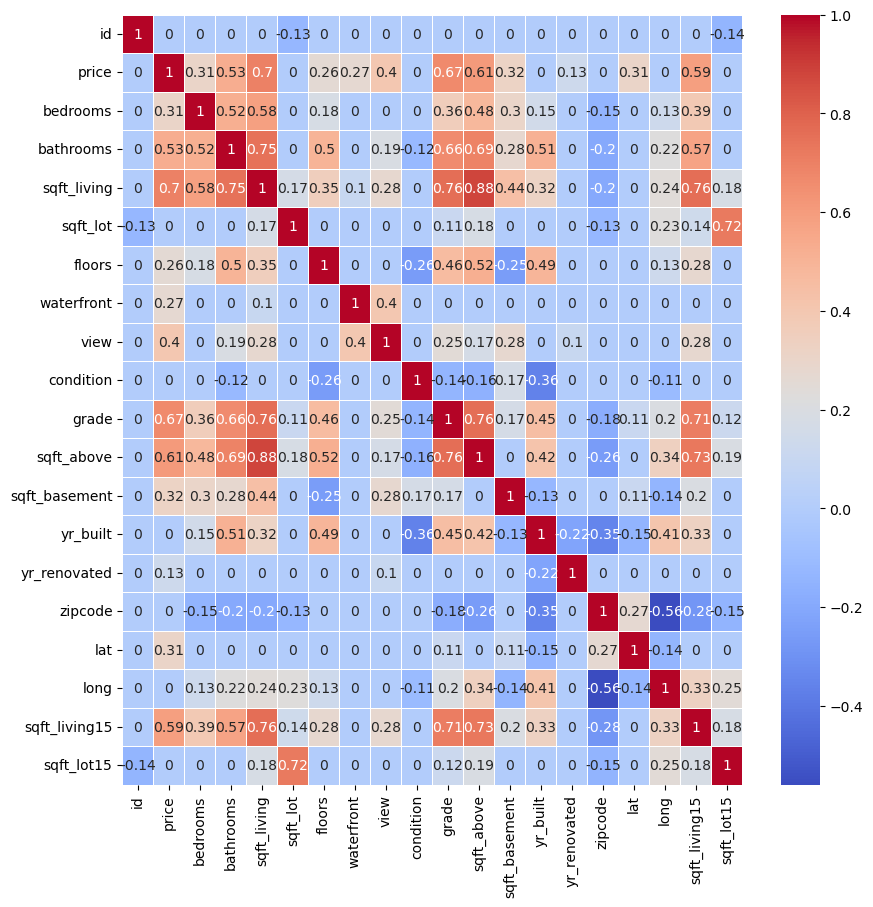

In [20]:
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, annot = True, linewidths = .5, cmap = 'coolwarm');

Тепловая карта корреляционной таблицы демонстрирует прямую линейную зависимость цены в большинстве случаев. Основные зависимости - жилые квадратные метры, общая оценка дома, квадратные метры дома, которые находятся выше земли, количество ванных комнат, общая оценка вида, квадратные метры дома, которые находятся ниже земли, количество спален, наличие набережной. 

Площадь является определяющим фактором, влияющим на стоимость дома, поэтому его (и его производные - квадратные метры дома, которые находятся выше земли, и квадратные метры дома, которые находятся ниже земли) следует убрать из списка.

Рассмотрим следующие факторы ниже: общая оценка дома, количество ванных комнат, общая оценка вида, количество спален, наличие набережной.

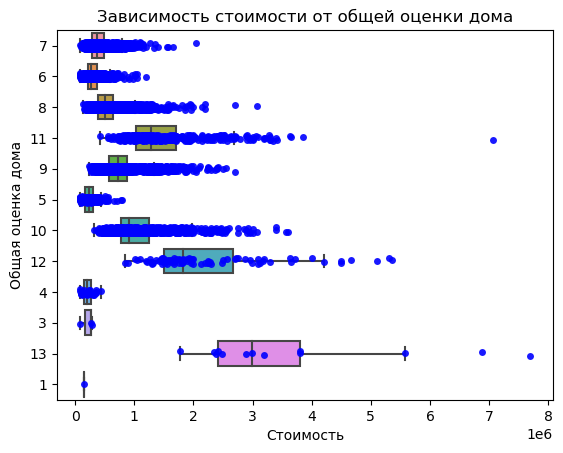

In [21]:
sns.boxplot(x = df['price'], y = df['grade'].astype('str'), whis = 1.5, showfliers = False)
sns.stripplot(x = df['price'], y = df['grade'].astype('str'), marker = 'o', alpha = 0.9, color = 'b')

plt.title('Зависимость стоимости от общей оценки дома')
plt.xlabel('Стоимость')
plt.ylabel('Общая оценка дома');

Вывод: стоимость дома возрастает с увеличением его оценки, количество домов с высокой оценкой падает, разброс стоимостей домов с высокой оценкой увеличивается

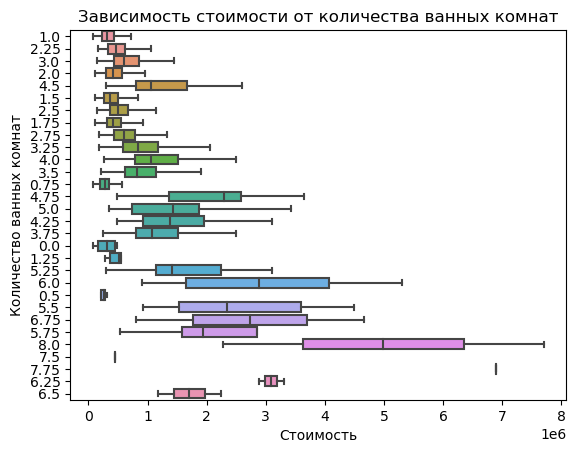

In [22]:
sns.boxplot(x = df['price'], y = df['bathrooms'].astype('str'), whis = 1.5, showfliers = False)

plt.title('Зависимость стоимости от количества ванных комнат')
plt.xlabel('Стоимость')
plt.ylabel('Количество ванных комнат');

Вывод: стоимость дома возрастает с увеличением количества ванных комнат, максимальную стоимость имеют дома с 8 ванными комнатами

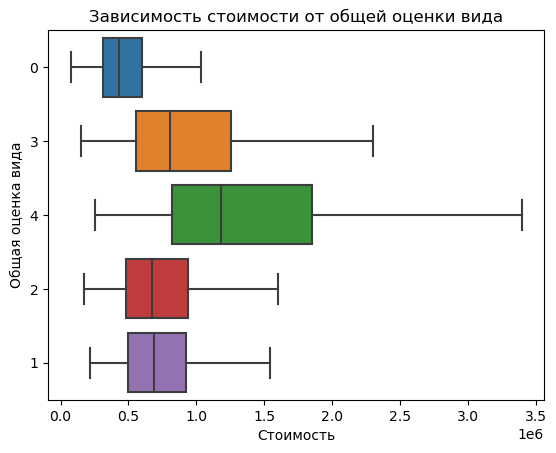

In [23]:
sns.boxplot(x = df['price'], y = df['view'].astype('str'), whis = 1.5, showfliers = False);

plt.title('Зависимость стоимости от общей оценки вида')
plt.xlabel('Стоимость')
plt.ylabel('Общая оценка вида');

Вывод: стоимость дома возрастает с увеличением общей оценки вида, максимальную стоимость имеют дома с общей оценкой вида 4

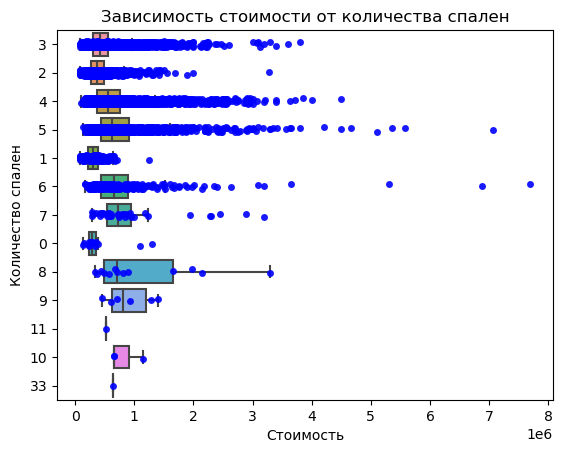

In [25]:
sns.boxplot(x = df['price'], y = df['bedrooms'].astype('str'), whis = 1.5, showfliers = False)
sns.stripplot(x = df['price'], y = df['bedrooms'].astype('str'), marker = 'o', alpha = 0.9, color = 'b')

plt.title('Зависимость стоимости от количества спален');
plt.xlabel('Стоимость')
plt.ylabel('Количество спален');

Вывод: большая часть домов имеет не более 6 спален, стоимость домов с 9 спальнями является наибольшей

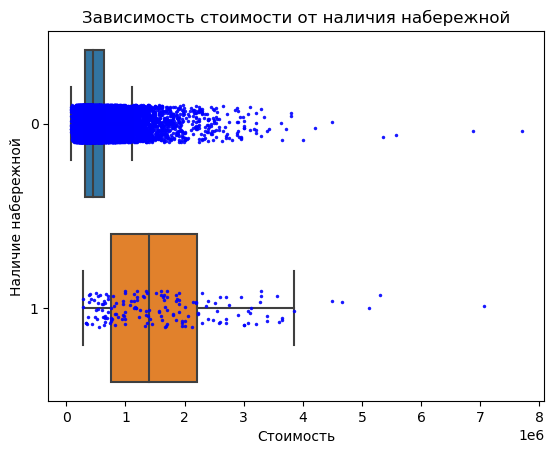

In [26]:
sns.boxplot(x = df['price'], y = df["waterfront"].astype('str'), whis = 1.5, showfliers = False)
sns.stripplot(x = df['price'], y = df["waterfront"].astype('str'), marker = '.', alpha = 0.9, color = 'b')

plt.title('Зависимость стоимости от наличия набережной')
plt.xlabel('Стоимость')
plt.ylabel('Наличие набережной');

Вывод: домов с набережной гораздо меньше, стоимость таких домов в разы выше